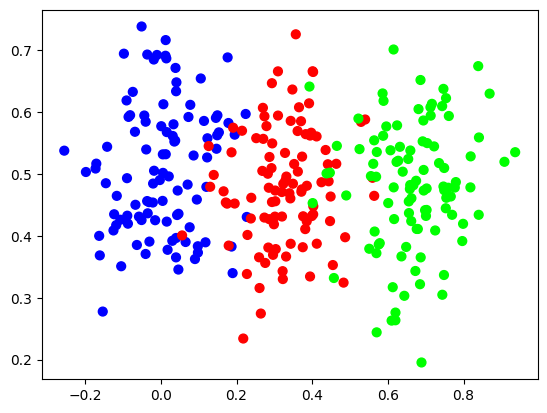

In [2]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X, Y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap='brg')
plt.show()

In [3]:
import numpy as np
from My_NN.nn import Layer_Dense
from My_NN.activation import ReLU, Softmax
from My_NN.nn import Loss_CategoricalCrossentropy

In [4]:
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Softmax()


In [5]:
loss_function = Loss_CategoricalCrossentropy()

In [13]:
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [14]:
for iteration in range(10000):
  #update weight
  dense1.weights -= 0.05 * np.random.randn(2, 3)
  dense1.biases -= 0.05 * np.random.randn(1, 3)
  dense2.weights -= 0.05 * np.random.randn(3, 3)
  dense2.biases -= 0.05 * np.random.randn(1, 3)
  
  #forward pass
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)
  
  #Loss
  loss=loss_function.calculate(activation2.output,Y)
  
  #acurracy
  pred=np.argmax(activation2.output,axis=1)
  accuracy=np.mean(pred==Y)
  
  #if loss is less than lowest_loss then save wt and bias
  if loss < lowest_loss:
    print('New set of weights found, iteration:', iteration,
    'loss:', loss, 'acc:', accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
  else:
    #revert weight to prev best
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()

      
      

New set of weights found, iteration: 0 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 7 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 10.745398 acc: 0.3333333333333333
New set of weights found, iteration: 12 loss: 10.7

ModuleNotFoundError: No module named 'L4'